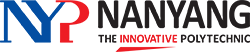

# IT2311 Assignment - Task 1a: Data Preparation

For this task, you are required to perform data understanding to examine your dataset and data cleaning to prepare the data for task 2 and 3.

Rename **DataPreparationStarter.ipynb** to **\<AdminNo\>_DataPreparation.ipynb** and complete the following sub-tasks:

Complete the following sub-tasks:

1. **Load Data**: Load your dataset
2. **Data Understanding**: Examine your dataset
3. **Data Cleaning**: Clean your data and perform all necessary pre-processing tasks
4. **Save Data**: Save the cleaned data for next task

For each sub-task, perform the necessary steps and **explain the rationale taken for each step in this Jupyter notebook**. 

**Done by: Tia Isabel Solanki 220892L**

## Import libraries and download the packages

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
import seaborn as sns
import re
import contractions
import string
import spacy
from contractions import contractions_dict
from itertools import chain
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Download NLTK dependencies
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

# Define stop words
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialize Spacy and load the English model
nlp = spacy.load("en_core_web_sm")

# Set English words set
english_words_set = set(words.words())

# Disable warnings 
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Tia\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Load Data

In [2]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)       

df = pd.read_excel('TM_Dataset.xlsx')  

## Data Understanding
Perform the necessary steps and explain the rationale taken here.



### All About the Dataset

The dataset is focused on the United Nations Sustainable Development Goal 3 (SDG 3), which is all about ensuring healthy lives and promoting well-being for all at all ages. The data you have includes various text content from different information sources like funding sources, open opportunities, news articles, and more. All this information is categorized under SDG 3 to help analyze and address global health issues and identify opportunities for improvement.

In [3]:
print(df.shape)

(3993, 2)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DataSource  3993 non-null   object
 1   Text        3993 non-null   object
dtypes: object(2)
memory usage: 62.5+ KB


### Frequency Distribution of the Most Frequent Words

In [5]:
# Tokenise words from the 'Text' column
all_words = [word.lower() for text in df['Text'] for word in word_tokenize(text)]

# Generate frequency distribution for the words
freq_dist = FreqDist(all_words)
print(freq_dist)

# show top results
print(freq_dist.most_common(10))

<FreqDist with 52310 samples and 3014149 outcomes>
[('<', 205535), ('>', 205530), ('the', 95650), (',', 93939), ('and', 80228), ('of', 74651), (';', 63732), ('to', 55005), ('&', 49129), ("''", 45841)]


### Texts Fewer than 10 words

In [6]:
# checks if text has fewer than 10 words
def has_fewer_than_10_words(text):
    return len(word_tokenize(text)) < 3

# filters texts with fewer than 10 words
filtered_texts = df[df['Text'].apply(has_fewer_than_10_words)]

# Display the filtered texts
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
filtered_texts[['DataSource', 'Text']]

,DataSource,Text
2366,Contract,Diabetes Control
2383,Contract,EBOLA Vaccine
2430,Contract,EXPAND-TB project
2467,Contract,Managing Diabetes
2486,Contract,Gestational Diabetes
2505,Contract,Diabetes Care
2534,Contract,Diabetes Clinics
2541,Contract,Diabetes Clinics
2583,Contract,Diabetes Micro-Clinics
2590,Contract,Diabetes Care


### Frequency Distribution of the Top 50 Words

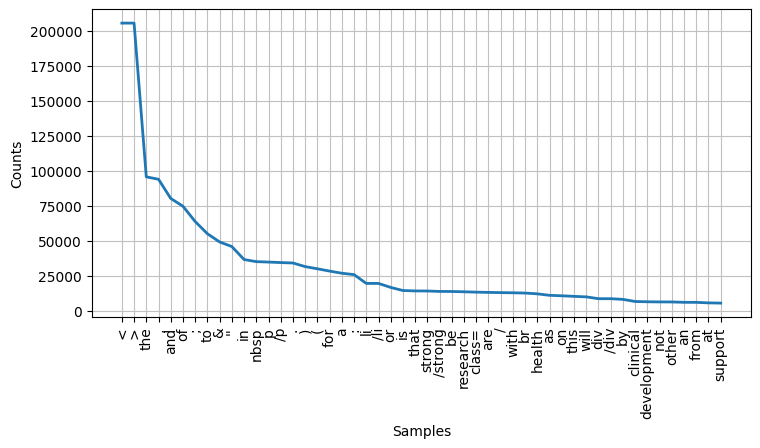

In [7]:
# Plot the freq dist of the top 50 words
plt.figure(figsize=(8.5, 4))
freq_dist.plot(50, cumulative=False)
plt.show()

### Generate Word Cloud from Frequencies 

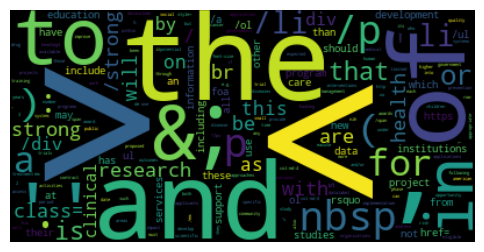

In [8]:
# create word cloud
wcloud = WordCloud().generate_from_frequencies(freq_dist)

# Plot the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Generate Word Cloud from Frequencies (without stop words)

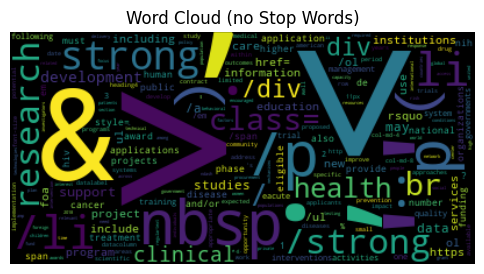

In [9]:
# GENERATE A WORD CLOUD WITHOUT THE STOPWORDS 
stop = set(stopwords.words('english'))

# Filter out stop words
filtered_words = [word for word in all_words if word not in stop]

# Generate frequency distribution for filtered words
filtered_freq_dist = FreqDist(filtered_words)

# Build word cloud without stop words
wcloud_filtered = WordCloud().generate_from_frequencies(filtered_freq_dist)

# Plot the word cloud without stop words
plt.figure(figsize=(6, 4))
plt.imshow(wcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (no Stop Words)')
plt.show()

### Count the Occurences of each Data Source 

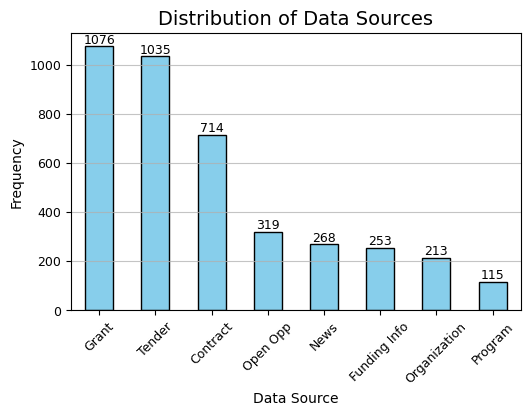

In [10]:
# Count the occurrences of each data source
data_source_counts = df['DataSource'].value_counts()

# Plot the dist of data sources
plt.figure(figsize=(5.8,3.6))  
data_source_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# titles and labels
plt.title('Distribution of Data Sources', fontsize=14)
plt.xlabel('Data Source', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# show counts on the bars
for index, value in enumerate(data_source_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9)

# Show the plot
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Summary Statistics for Text Lengths

In [11]:
# Summary Stats for text length
df['Text_Length'] = df['Text'].apply(len) 
print(df['Text_Length'].describe())

count     3993.000000
mean      3874.322815
std       5344.115917
min         13.000000
25%        130.000000
50%       1677.000000
75%       4860.000000
max      31277.000000
Name: Text_Length, dtype: float64


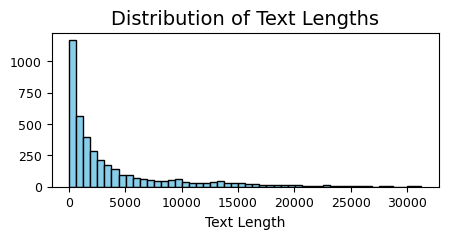

In [12]:
# dist of text lengths
plt.figure(figsize=(5, 2))
plt.hist(df['Text_Length'], bins=50, color='skyblue', edgecolor='black')  
plt.title('Distribution of Text Lengths', fontsize=14)  
plt.xlabel('Text Length', fontsize=10)  
plt.xticks(fontsize=9)  
plt.yticks(fontsize=9)  
plt.show()

### Visual Distributon of Text Lengths

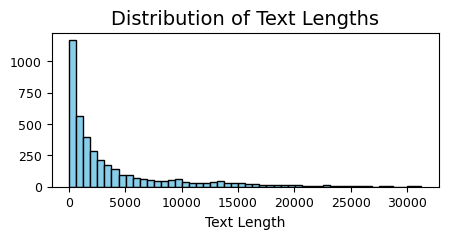

In [13]:
# dist of text lengths
plt.figure(figsize=(5, 2))
plt.hist(df['Text_Length'], bins=50, color='skyblue', edgecolor='black')  
plt.title('Distribution of Text Lengths', fontsize=14)  
plt.xlabel('Text Length', fontsize=10)  
plt.xticks(fontsize=9)  
plt.yticks(fontsize=9)  
plt.show()

### Visual Distributon of Word Counts

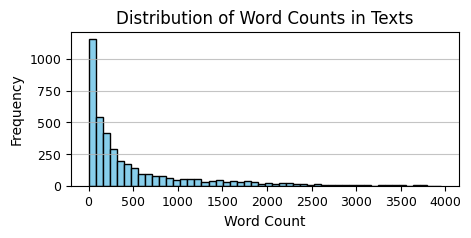

In [14]:
# Calculate the word count for each text
df['Word_Count'] = df['Text'].str.split().map(lambda x: len(x))

# histogram
plt.figure(figsize=(5, 2))
plt.hist(df['Word_Count'], bins=50, color='skyblue', edgecolor='black')

# titles and labels
plt.title('Distribution of Word Counts in Texts', fontsize=12)
plt.xlabel('Word Count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# ticks and add gridlines
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Bigrams and Trigrams Visualisations

In [15]:
# generate n-grams
def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

In [16]:
# Generate bi-grams and tri-grams for each tokenized text
# Tokenize the 'Text' column
df['tokens'] = df['Text'].apply(lambda x: word_tokenize(x.lower()))
df['bigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, 3))

In [17]:
# Count the freq of each bigram and trigram
bigram_counts = Counter(chain.from_iterable(df['bigrams']))
trigram_counts = Counter(chain.from_iterable(df['trigrams']))

In [18]:
# Get the top 10 most common bi-grams and tri-grams
top_bigrams = bigram_counts.most_common(10)
top_trigrams = trigram_counts.most_common(10)

In [19]:
# Convert bi-grams and tri-grams to strings for plotting
top_bigrams_strings = [' '.join(gram) for gram, count in top_bigrams]
top_bigrams_counts = [count for gram, count in top_bigrams]

In [20]:
top_trigrams_strings = [' '.join(gram) for gram, count in top_trigrams]
top_trigrams_counts = [count for gram, count in top_trigrams]

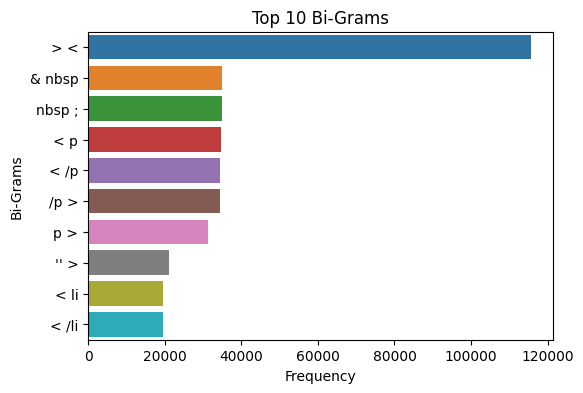

In [21]:
# horizontal bar chart for bi-grams
plt.figure(figsize=(6, 4))
sns.barplot(x=top_bigrams_counts, y=top_bigrams_strings, hue=top_bigrams_strings, dodge=False, legend=False)
plt.title('Top 10 Bi-Grams')
plt.xlabel('Frequency')
plt.ylabel('Bi-Grams')
plt.legend([], [], frameon=False) # no legend
plt.show()

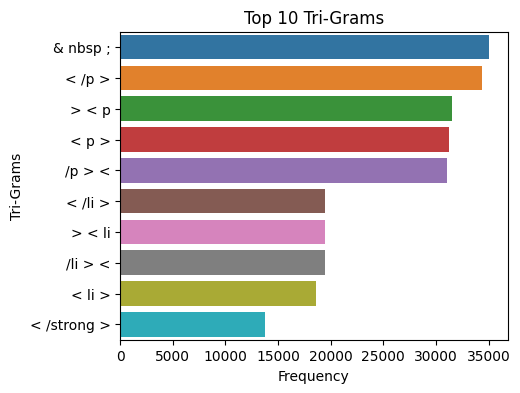

In [22]:
# horizontal bar chart for tri-grams
plt.figure(figsize=(5, 4))
sns.barplot(x=top_trigrams_counts, y=top_trigrams_strings, hue=top_trigrams_strings, dodge=False, legend=False)
plt.title('Top 10 Tri-Grams')
plt.xlabel('Frequency')
plt.ylabel('Tri-Grams')
plt.legend([], [], frameon=False) # no legend
plt.show()

## Data Cleaning
Perform the necessary steps and explain the rationale taken here.



### Duplicates

In [23]:
# Identify duplicate rows based on the 'Text' column
duplicates = df.duplicated(subset=['Text'])

# Count the number of duplicates
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows based on 'Text' column: {num_duplicates}")

# Drop duplicate rows based on the 'Text' column, keeping only the first instance
df = df.drop_duplicates(subset=['Text'], keep='first')

# show the cleaned DataFrame
print("DataFrame after removing duplicates:")
df.shape

Number of duplicate rows based on 'Text' column: 46
DataFrame after removing duplicates:


(3947, 7)

### Cleaning Functions

In [24]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()
    
df['Text'] = df['Text'].apply(remove_html_tags)

In [25]:
def replace_html_breaks(text):
    return text.replace('<br>', ' ').replace('<br />', ' ').replace('</br>', ' ')

df['Text'] = df['Text'].apply(replace_html_breaks)

In [26]:
def remove_links_and_emails(text):
    # Regex pattern to remove URLs (including 'http', 'https', 'www', etc.)
    url_pattern = r'https?://\S+|www\.\S+'
    
    # Regex pattern to remove email addresses (fully, including domain and part before the @)
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
    
    # Remove URLs (including any other form of links)
    text = re.sub(url_pattern, '', text)
    
    # Remove emails (fully, including domain and part before the @)
    text = re.sub(email_pattern, '', text)
    
    # Clean up any extra spaces or unwanted punctuation that may have been left behind
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Removing any trailing punctuation that might be left after removing email addresses
    text = re.sub(r'\s([?.!,](?:\s|$))', r'\1', text)

    return text

df['Text'] = df['Text'].apply(remove_links_and_emails)

In [27]:
def remove_months_and_numbers(text):
    # List of month names to be removed
    months = [
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
        'September', 'October', 'November', 'December'
    ]
    
    # Regex patterns for months, numbers, and words with numbers
    month_pattern = r'\b(?:' + '|'.join(months) + r')\b'  # Match any month name
    number_pattern = r'\b\d+\b'  # Match any number (standalone)
    word_with_number_pattern = r'\b\w*\d\w*\b'  # Match words containing numbers

    # Remove months
    text = re.sub(month_pattern, '', text)
    # Remove standalone numbers
    text = re.sub(number_pattern, '', text)
    # Remove words that contain numbers
    text = re.sub(word_with_number_pattern, '', text)

    # Clean up multiple spaces or leading/trailing spaces and ensure punctuation remains intact
    text = re.sub(r'\s+', ' ', text).strip()

    # Handle punctuation left without words
    text = re.sub(r'(?<=\s)[^\w\s]+(?=\s)', '', text)  # Remove isolated punctuation marks between words

    return text

df['Text'] = df['Text'].apply(remove_months_and_numbers)

In [28]:
def replace_hyphens_with_space(text):
    # Replace all hyphens with spaces, even for multi-word hyphenated phrases
    text = re.sub(r'\b([a-zA-Z0-9]+(?:-[a-zA-Z0-9]+)+)\b', lambda x: x.group(0).replace('-', ' '), text)
    return text

df['Text'] = df['Text'].apply(replace_hyphens_with_space)

In [29]:
def clean_special_chars(text):
    
    text = re.sub(r'[^a-zA-Z0-9\s_-]', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Text'] = df['Text'].apply(clean_special_chars)

In [30]:
def remove_single_letters(text):
    # Remove single letters (a, b, c, etc.)
    return re.sub(r'\b[a-zA-Z]\b', '', text).strip()

df['Text'] = df['Text'].apply(remove_single_letters)

In [31]:
def make_lowercase(text):
    return text.lower()

df['Text'] = df['Text'].apply(make_lowercase)

In [32]:
def remove_extra_whitespaces(text):
    # Remove leading/trailing whitespaces and replace multiple spaces with a single space
    return re.sub(r'\s+', ' ', text).strip()

df['Text'] = df['Text'].apply(remove_extra_whitespaces)

In [33]:
def remove_punctuation(text):
    # Remove punctuation using string.punctuation
    return text.translate(str.maketrans('', '', string.punctuation))

df['Text'] = df['Text'].apply(remove_punctuation)

In [34]:
# Function to extract named entities and add them to the tokens
def extract_named_entities_as_tokens(text):
    if isinstance(text, str):
        doc = nlp(text)
        
        # Initialize an empty list to store tokens, including named entities
        tokens = []
        
        # Loop through the tokens in the text
        for token in doc:
            # If the token is part of a named entity, add the whole entity as a single token
            if token.ent_type_ in ["ORG", "PERSON", "GPE", "PRODUCT", "EVENT", "WORK_OF_ART"]:
                tokens.append(token.text.lower())
            else:
                # Otherwise, just add the regular token
                tokens.append(token.text.lower())
        
        # Return the tokens as a list of individual tokens
        return tokens
    else:
        return []  # Return an empty list if the input is not a valid string

# Apply the NER extraction and return tokens as lists
df['Text'] = df['Text'].apply(extract_named_entities_as_tokens)

In [35]:
df.head()

,DataSource,Text,Text_Length,Word_Count,tokens,bigrams,trigrams
0,Open Opp,"[improving, quality, and, safety, of, care, opportunity, background, the, duke, endowment, has, redesigned, the, grant, application, process, to, be, more, streamlined, and, intuitive, we, believe, this, new, process, will, strengthen, our, work, together, in, the, future, the, new, application, consists, of, seven, questions, once, your, online, application, is, completed, an, automated, response, will, confirm, that, it, was, received, health, care, staff, will, contact, you, should, any, questions, arise, during, our, review, if, you, wish, preview, the, application, questions, before, starting, online, application, deadline, and, opportunity, structureeligibility, for, health, care, grants, in, his, indenture, of, trust, our, founder, restricted, health, care, ...]",4733,394,"[improving, quality, and, safety, of, care, :, <, p, >, <, strong, >, opportunity, background, <, /strong, >, <, /p, >, <, p, >, the, duke, endowment, has, redesigned, the, grant, application, process, to, be, more, streamlined, and, intuitive, ., we, believe, this, new, process, will, strengthen, our, &, nbsp, ;, work, together, in, the, future., <, /p, >, <, p, >, the, new, application, consists, of, seven, questions., &, nbsp, ;, &, nbsp, ;, once, your, online, application, is, completed, ,, an, automated, response, will, confirm, &, nbsp, ;, that, it, was, received, ., health, care, staff, &, nbsp, ...]","[(improving, quality), (quality, and), (and, safety), (safety, of), (of, care), (care, :), (:, <), (<, p), (p, >), (>, <), (<, strong), (strong, >), (>, opportunity), (opportunity, background), (background, <), (<, /strong), (/strong, >), (>, <), (<, /p), (/p, >), (>, <), (<, p), (p, >), (>, the), (the, duke), (duke, endowment), (endowment, has), (has, redesigned), (redesigned, the), (the, grant), (grant, application), (application, process), (process, to), (to, be), (be, more), (more, streamlined), (streamlined, and), (and, intuitive), (intuitive, .), (., we), (we, believe), (believe, this), (this, new), (new, process), (process, will), (will, strengthen), (strengthen, our), (our, &), (&, nbsp), (nbsp, ;), (;, work), (work, together), (together, in), (in, the), (the, future.), (future., <), (<, /p), (/p, >), (>, <), (<, p), (p, >), (>, the), (the, new), (new, application), (application, consists), (consists, of), (of, seven), (seven, questions.), (questions., &), (&, nbsp), (nbsp, ;), (;, &), (&, nbsp), (nbsp, ;), (;, once), (once, your), (your, online), (online, application), (application, is), (is, completed), (completed, ,), (,, an), (an, automated), (automated, response), (response, will), (will, confirm), (confirm, &), (&, nbsp), (nbsp, ;), (;, that), (that, it), (it, was), (was, received), (received, .), (., health), (health, care), (care, staff), (staff, &), (&, nbsp), (nbsp, ;), ...]","[(improving, quality, and), (quality, and, safety), (and, safety, of), (safety, of, care), (of, care, :), (care, :, <), (:, <, p), (<, p, >), (p, >, <), (>, <, strong), (<, strong, >), (strong, >, opportunity), (>, opportunity, background), (opportunity, background, <), (background, <, /strong), (<, /strong, >), (/strong, >, <), (>, <, /p), (<, /p, >), (/p, >, <), (>, <, p), (<, p, >), (p, >, the), (>, the, duke), (the, duke, endowment), (duke, endowment, has), (endowment, has, redesigned), (has, redesigned, the), (redesigned, the, grant), (the, grant, application), (grant, application, process), (application, process, to), (process, to, be), (to, be, more), (be, more, streamlined), (more, streamlined, and), (streamlined, and, intuitive), (and, intuitive, .), (intuitive, ., we), (., we, believe), (we, believe, this), (believe, this, new), (this, new, process), (new, process, will), (process, will, strengthen), (will, strengthen, our), (strengthen, our, &), (our, &, nbsp), (&, nbsp, ;), (nbsp, ;, work), (;, work, together), (work, together, in), (together, in, the), (in, the, future

In [39]:
def tokenize_text(text):
    if isinstance(text, str):  # Ensure input is a string
        return word_tokenize(text)
    else:
        return []  # Return empty list if not a string

df['tokens'] = df['Text'].apply(tokenize_text)

In [40]:
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['Text'].apply(remove_stop_words)

In [41]:
def replace_specific_words(tokens_list):
    # Define specific replacements
    word_replacements = {
        "licitaci": "tender",
        "salud": "health"
    }
    
    return [
        [word_replacements[word] if word in word_replacements else word for word in tokens]
        for tokens in tokens_list
    ]



df['tokens'] = replace_specific_words(df['tokens'])

In [42]:
nlp = spacy.load("en_core_web_sm")

def lemmatization_and_filter(tokens):
    # Define allowed part-of-speech tags (e.g., nouns, verbs, adjectives, adverbs)
    allowed_pos = {"NOUN", "VERB", "ADJ", "ADV"}

    # Create a SpaCy doc object
    doc = nlp(" ".join(tokens))
    
    # Lemmatize tokens and filter by allowed part-of-speech tags
    return [token.lemma_ for token in doc if token.pos_ in allowed_pos]


df['tokens'] = df['tokens'].apply(lemmatization_and_filter)

In [43]:
def remove_non_meaningful_words_from_tokens(tokens):

    # List of words to remove
    non_meaningful_words = [
        'non', 'may', 'type', 'time', 'lot', 'base', 'datum', 'foa', 'tb', 'also', 
        'well', 'er', 'rp', 'use', 
        'de', 'la', 'en', 'et', 'des', 'el', 'le', 'les', 'los', 'del', 'du', 
        'ii', 'pc', 'pr', 'con', 'une', 'una', 'por', 'al', 'dans', 'iii', 'include', 'level', 'health' # health is a frequent word
    ]
    
    # Use a set for faster lookups
    non_meaningful_words_set = set(non_meaningful_words)
    
    # Remove non-meaningful words
    filtered_tokens = [word for word in tokens if word.lower() not in non_meaningful_words_set]
    
    return filtered_tokens

df['tokens'] = df['tokens'].apply(remove_non_meaningful_words_from_tokens)

In [44]:
# Convert the list of tokens into a single string for each row and name the column 'Cleaned_Text'
df['cleaned_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [45]:
df[['tokens', 'cleaned_text']].to_csv('cleaned_text.csv', index=False)

## Save Data

In [46]:
# Convert the list of tokens into a single string for each row and name the column 'Cleaned_Text'
df['cleaned_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Save the cleaned tokens and cleaned text to a CSV file
df[['tokens', 'cleaned_text']].to_csv('cleaned_text.csv', index=False)

## Submission
Export your completed work as HTML. Select **File** > **Download as** > **HTML (.html)**.